**Goal: Given a set of text movie reviews that have been labeled negative or Positive**

IMPORTING RELEVANT LIBRARIES

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from sklearn.pipeline import Pipeline

READING THE TEXT DOCUMENT FROM THE FILE PATH

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


EXPLORATORY DATA ANALYSIS

In [7]:
# CHECK TO SEE IF THERE ARE ANY MISSING DATA
df.isnull().sum()

label      0
review    35
dtype: int64

In [8]:
# DROP THE CELLS WHERE THERE ARE ANY MISSING DATA
df = df.dropna()

In [9]:
df.isnull().sum()

label     0
review    0
dtype: int64

In [10]:
# CHECK IF ANY REVIEWS ARE BLANK STRINGS AND NOT JUST NaN
df = df[-df['review'].str.isspace()]

In [14]:
# CHECK IF ANY REVIEWS ARE EMPTY STRINGS.
df[df['review'].apply(lambda review: review=='')]

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1938, dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [16]:
#CONFIRM THE VALUE COUNTS PER LABEL
df.label.value_counts()

neg    969
pos    969
Name: label, dtype: int64

**APPLY COUNT VECTORIZER MODEL TO GET THE TOP X NEGATIVE REVIEW WORDS THAT ARE NOT ENGLISH STOP WORDS**

In [23]:
# count vectorizer instance
count_vect = CountVectorizer(stop_words='english')

# filtered negative labels and reviews from the dataframe
Filtd_Neg_Review_label = df[df['label']=='neg']['review']

# fit transform on the filtered label
matrix = count_vect.fit_transform(Filtd_Neg_Review_label)

# perform the frequency count of the words into a dictionary
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])

# sort from largest to smallest selecting the first 20
sorted_list = sorted(freqs, key=lambda x: -x[1])[:20]

In [24]:
sorted_list

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

**APPLY COUNT VECTORIZER MODEL TO GET THE TOP X POSITIVE REVIEW WORDS THAT ARE NOT ENGLISH STOP WORDS**

In [25]:
# count vectorizer instance
count_vect = CountVectorizer(stop_words='english')

# filtered negative labels and reviews from the dataframe
Filtd_Neg_Review_label = df[df['label']=='pos']['review']

# fit transform on the filtered label
matrix = count_vect.fit_transform(Filtd_Neg_Review_label)

# perform the frequency count of the words into a dictionary
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])

# sort from largest to smallest selecting the first 20
sorted_list = sorted(freqs, key=lambda x: -x[1])[:20]

In [26]:
sorted_list

[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

**CREATE FEATURES AND LABELS**

In [49]:
X = df.review
y = df.label

In [50]:
X

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
4       my first press screening of 1998 and already i...
                              ...                        
1995    i like movies with albert brooks , and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict : spine-chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago , when i first download...
Name: review, Length: 1938, dtype: object

In [51]:
y

0       neg
1       neg
2       pos
3       pos
4       neg
       ... 
1995    pos
1996    pos
1997    pos
1998    pos
1999    pos
Name: label, Length: 1938, dtype: object

**PERFORM A TRAIN TEST SPLIT**

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)

**CREATE A PIPELINE**

In [53]:
pipeline = Pipeline([('tfidf',TfidfVectorizer()),
                    ('svc',LinearSVC())])

In [54]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [55]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**PREDICT ON THE TEST DATASET**

In [56]:
predictions = pipeline.predict(X_test)

In [57]:
predictions

array(['neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg',
       'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos',
       'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg',
       'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos',
       'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos',
       'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos',
       'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg',
       'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos',
       'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg',
       'neg', 'neg',

In [58]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



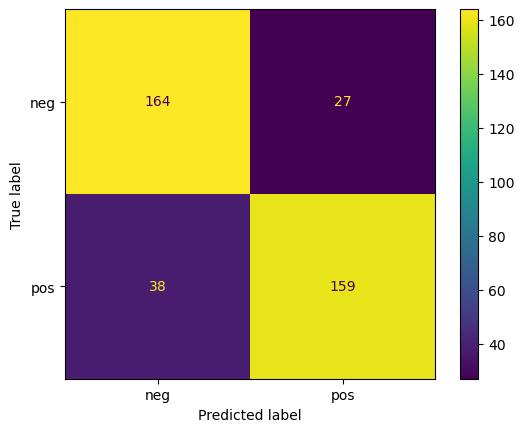

In [59]:
ConfusionMatrixDisplay.from_estimator(pipeline,X_test,y_test)